In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def potf(x):
    return 0*x

def potpot(x):
    return 0*x

def potq(x):
    return 10*x**2/2

def step(x,pot,dx=0.01):
    dx = np.random.choice([-1,1],len(x))*dx
    return x + (np.random.random(len(x))<np.exp(-pot(x+dx)+pot(x)))*dx

In [7]:
def plot_sim(x):
    msd = np.average(x**2,axis=1)
    hist,bins = np.histogram(x,bins=50,density=True)
    fig,ax = plt.subplots(3,1,figsize=(20,20))
    for j in range(0,x.shape[1]):
        ax[0].plot(x[:,j])
    ax[1].plot(msd)
    ax[2].plot(bins[:-1],hist)

def do_sim(num_steps,num_traj,pot,xinit=0):
    x = np.ones((num_steps,num_traj))*xinit
    for i in range(1,num_steps):
        x[i] = step(x[i-1],pot)
    return x

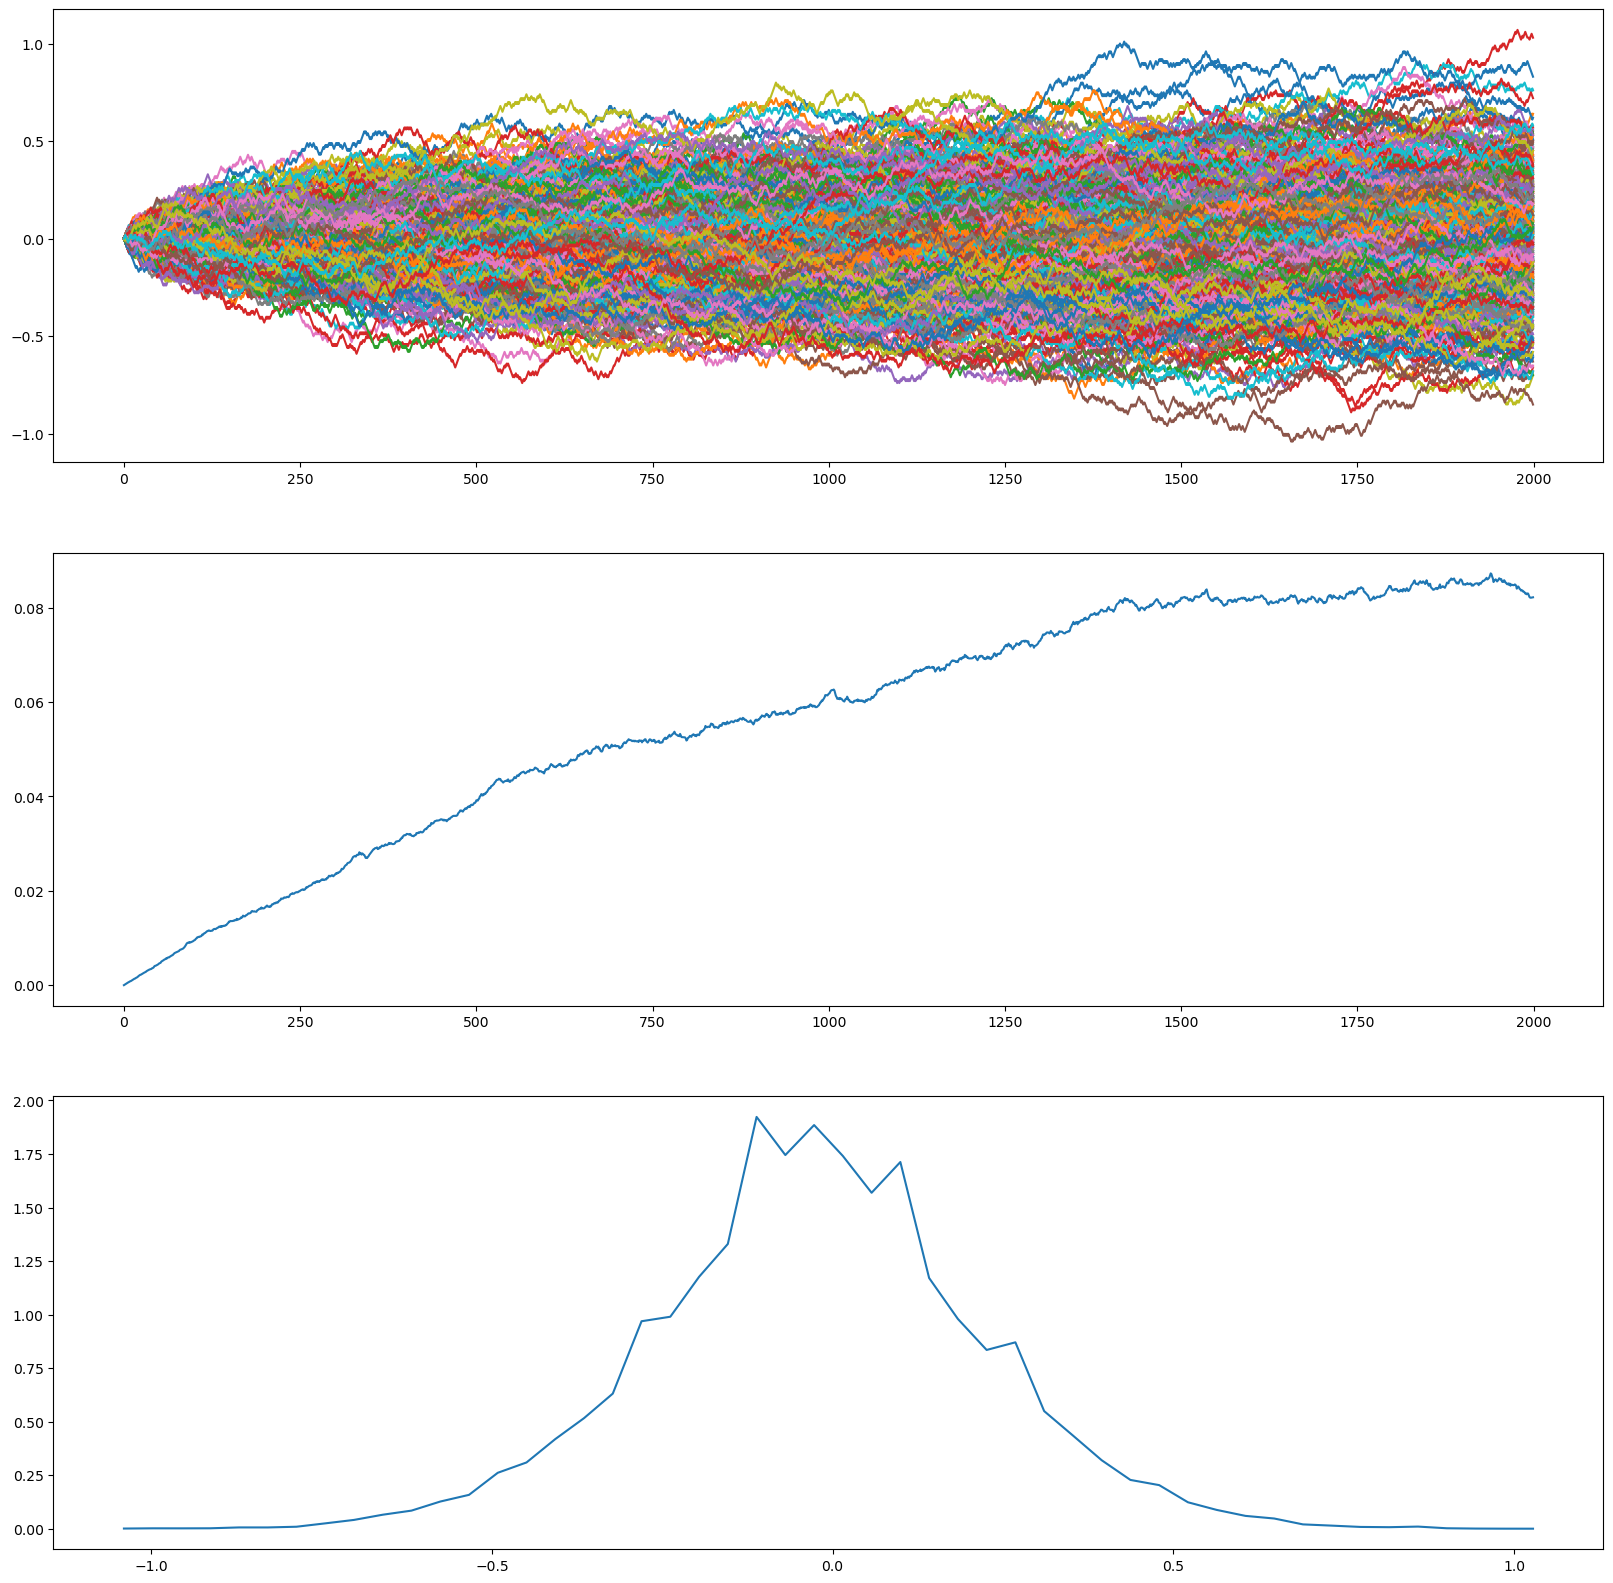

In [11]:
plot_sim(do_sim(2000,500,potq))

In [74]:
np.inf

inf